<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01794003/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones

 ****Nombre Juan Villamil****

 ****Matricula:A01794003****

correo: A01794003@tec.mx
 
Materia: Ciencia y Analítica de Datos.

Fecha: 27/10/2022.

Profesor titular: María de la Paz Rico Fernández.

Profesor tutor: Orlando Figón Cruz.

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [7]:
##-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(W,np.dot(D,Winv))
print(B)

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [3]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [21]:
#Matriz 1
import numpy as np
from numpy import array
from numpy.linalg import eig
A = array([[3, 0, 2], [3, 0, -2], [0, 0, 1]])
print("*Matri*")
print(A)
values, vectors = eig(A)
print(values) 
print(vectors)

*Matri*
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  0  1]]
[0. 3. 1.]
[[ 0.          0.70710678 -0.19245009]
 [ 1.          0.70710678 -0.96225045]
 [ 0.          0.          0.19245009]]


In [28]:
values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("Reconstruida")
B = np.dot(W,np.dot(D,Winv))
print(np.round(B.real))
print(B)
print("Testeo")
print (values, vectors)
print (W)
print (Winv)

Reconstruida
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  0.  1.]]
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  0.  1.]]
Testeo
[0. 3. 1.] [[ 0.          0.70710678 -0.19245009]
 [ 1.          0.70710678 -0.96225045]
 [ 0.          0.          0.19245009]]
[[ 0.          0.70710678 -0.19245009]
 [ 1.          0.70710678 -0.96225045]
 [ 0.          0.          0.19245009]]
[[-1.          1.          4.        ]
 [ 1.41421356  0.          1.41421356]
 [ 0.          0.          5.19615242]]


In [30]:
#Matriz 2
import numpy as np
from numpy import array
from numpy.linalg import eig
A = array([[1, 3, 8], [2, 0, 0], [0, 1, 1]])
print("*Matriz*")
print(A)
values, vectors = eig(A)
print(values)
print(vectors)
print("Testeo")
print(values, vectors)

*Matriz*
[[1 3 8]
 [2 0 0]
 [0 1 1]]
[ 3.92379129+0.j         -0.96189565+1.27409273j -0.96189565-1.27409273j]
[[-0.88038364+0.j          0.35651441-0.47222629j  0.35651441+0.47222629j]
 [-0.44874132+0.j         -0.7412746 +0.j         -0.7412746 -0.j        ]
 [-0.15347926+0.j          0.26575498+0.17258639j  0.26575498-0.17258639j]]
Testeo
[ 3.92379129+0.j         -0.96189565+1.27409273j -0.96189565-1.27409273j] [[-0.88038364+0.j          0.35651441-0.47222629j  0.35651441+0.47222629j]
 [-0.44874132+0.j         -0.7412746 +0.j         -0.7412746 -0.j        ]
 [-0.15347926+0.j          0.26575498+0.17258639j  0.26575498-0.17258639j]]


In [35]:
values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("*Reconstruida*")
B = np.dot(W,np.dot(D,Winv))
print(np.round(B.real))
print("Testeo")
print(W)
print(Winv)
print(D)
print(B)

*Reconstruida*
[[ 1.  3.  8.]
 [ 2.  0.  0.]
 [-0.  1.  1.]]
Testeo
[[-0.88038364+0.j          0.35651441-0.47222629j  0.35651441+0.47222629j]
 [-0.44874132+0.j         -0.7412746 +0.j         -0.7412746 -0.j        ]
 [-0.15347926+0.j          0.26575498+0.17258639j  0.26575498-0.17258639j]]
[[-0.51115794-0.00000000e+00j -0.74725957-0.00000000e+00j
  -1.39861678+1.26106731e-16j]
 [ 0.15471843+4.65524916e-01j -0.44833167-3.58092837e-01j
   0.42333646-1.62334292e+00j]
 [ 0.15471843-4.65524916e-01j -0.44833167+3.58092837e-01j
   0.42333646+1.62334292e+00j]]
[[ 3.92379129+0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.96189565+1.27409273j  0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.96189565-1.27409273j]]
[[ 1.00000000e+00+2.00797081e-17j  3.00000000e+00+1.31141134e-17j
   8.00000000e+00-3.71368009e-16j]
 [ 2.00000000e+00+4.82417572e-18j  4.35397437e-16-8.60175917e-18j
   4.05591460e-15-2.78793809e-16j]
 [-3.46944

In [40]:
#Matriz 3
import numpy as np
from numpy import array
from numpy.linalg import eig
A = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
values, vectors = eig(A)
print('******') 
print(values) 
print(vectors) 
print("Testeo")
print(A) 

******
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
Testeo
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]


In [42]:
values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("Reconstruida")
B=np.dot(W,D)
B=np.dot(B,Winv)
B=np.round(B,2)
print(B)
print("Testeo")
print(W)
print(D)
print(Winv)

Reconstruida
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
Testeo
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
[[ 6.89167094  0.          0.        ]
 [ 0.         -0.214175    0.        ]
 [ 0.          0.         -0.67749594]]
[[ 1.57159201  1.10218456  0.18707504]
 [ 3.67287466  2.64661304 -2.17976243]
 [-2.90368638 -3.32287499  1.98085426]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


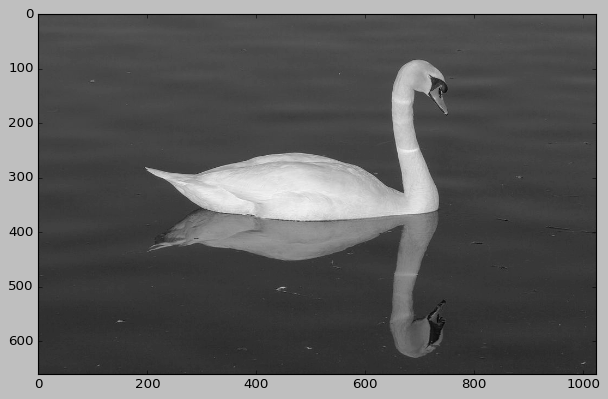

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F6688FA1E90>


In [62]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [63]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [64]:
U.shape

(660, 660)

In [65]:
V.shape

(1024, 1024)

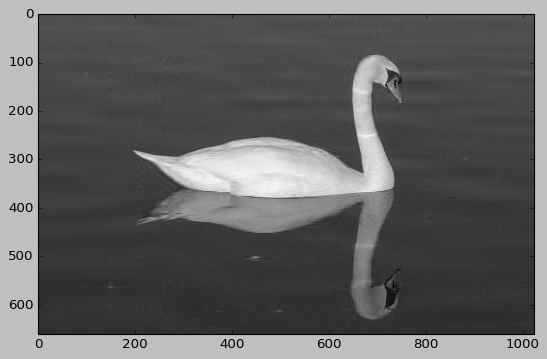

Felicidades la imagen está comprimida


In [66]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[51. 54. 57. ... 68. 61. 58.]


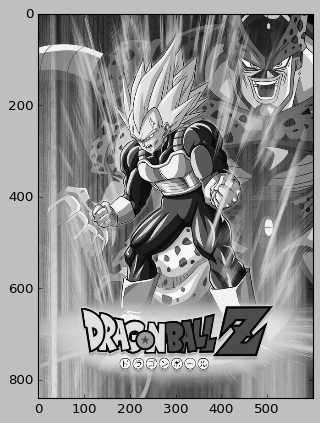

<PIL.Image.Image image mode=LA size=600x839 at 0x7F6687B73AD0>


In [73]:
#imagen 1
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://i.pinimg.com/originals/0c/5c/ec/0c5cec3449854e87fb721a6e0dfc4159.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)
print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [74]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(839, 600)

In [75]:
U.shape

(839, 839)

In [76]:
V.shape

(600, 600)

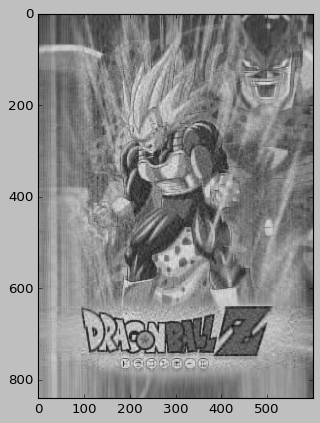

Felicidades la imagen está comprimida


In [77]:
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[255. 255. 255. ... 255. 255. 255.]


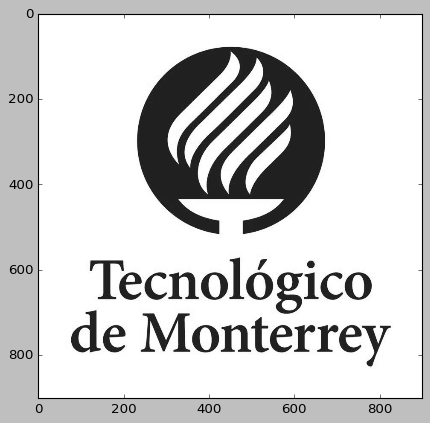

<PIL.Image.Image image mode=LA size=900x900 at 0x7F6687F09C50>


In [81]:
#imagen 2
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.enroll-u.com/_i/1/7/7/4ecd9be0-eec4-11e9-9992-0231b47980f0.jpeg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)
print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [82]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(900, 900)

In [83]:
U.shape

(900, 900)

In [84]:
V.shape

(900, 900)

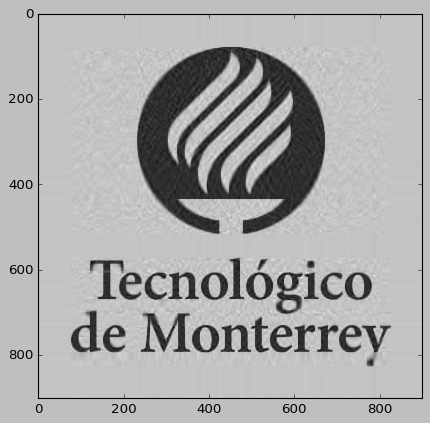

Felicidades la imagen está comprimida


In [85]:
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[197. 197. 196. ...   7.   8.   8.]


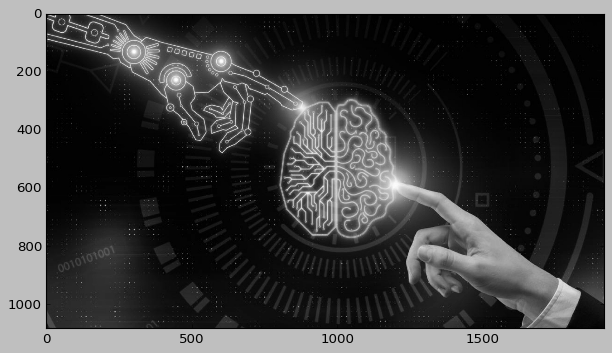

<PIL.Image.Image image mode=LA size=1920x1080 at 0x7F6687C26710>


In [89]:
#imagen 3
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://gaceta.cch.unam.mx/sites/default/files/styles/imagen_articulos_1920x1080/public/2020-06/inteligencia-artificial.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)
print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [90]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(1080, 1920)

In [91]:
U.shape

(1080, 1080)

In [92]:
V.shape

(1920, 1920)

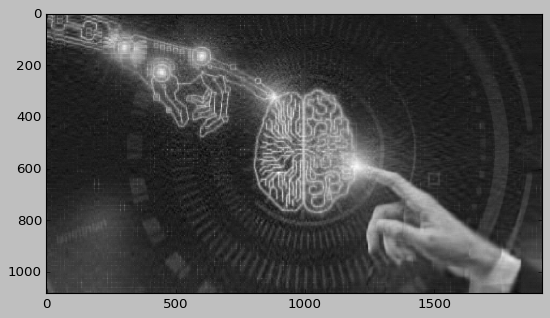

Felicidades la imagen está comprimida


In [93]:
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [95]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

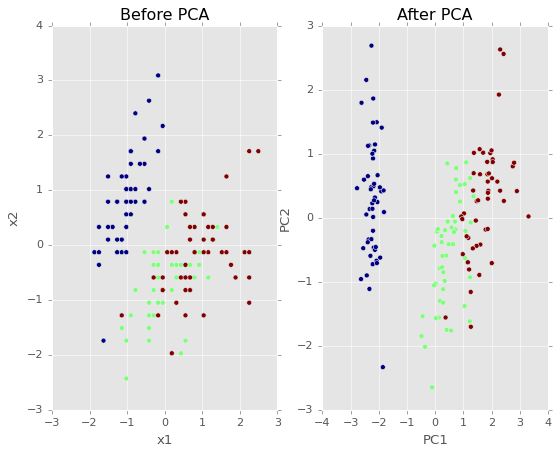

In [96]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [97]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [98]:
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [99]:
pca.explained_variance_
array([2.93808505, 0.9201649 ])

array([2.93808505, 0.9201649 ])

In [102]:
print(pca.explained_variance_ratio_)
print(pca)

[0.72962445 0.22850762]
PCA(n_components=2)


In [104]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

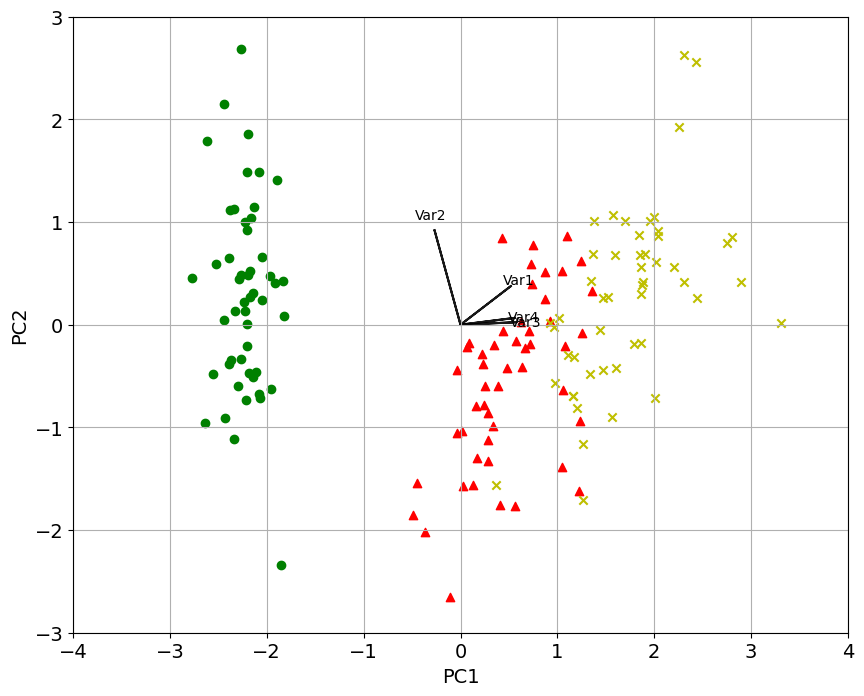

In [105]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [107]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957


0.9628654314027957

In [108]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

# se evidencia en la variabilidad, lo importante de los componentes principales, validando cada componente con respecto a su mayor varianza en los datos , donde pcs ayuda a detectar lo mas importante de los datos 

¿Qué es feature importance y para que nos sirve?

Feature importance Es la macnitud  de los eigenvectors;

*Sus valores son importantes dado que representan la magnitud  de la varianza de las variables que el componente principal optiene.

¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

Como podemos comprimir imagenes para ejercicios practicos, reduciendo peso, medidas y esto pued3e ayudar a la computacion y reducir el ancho de banda en una aplicacion practica.

*utilizar graficas Biplot sirve para realizar analisis visuales y la varianza de datos.

*Ejercicios matematicos realizados en papel por varias horas con eigenventores y matrices, tienen una utilidad practica y se resuelven a partir de programacion.

*la direccion de los vectores es una correlacion con Biplot

*Estandarizar es super impoartante, desde excell hasta pyton con transformacion


¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

En una aplicacion de tranferencia de datos masivos,  un repositorio de imagenes funcionales,  lo utilizaria para almacecnar y trasnferir imagenes ahorrando ancho de banda, tiempo y procesamiento. 